# Generative AI Data Cleaning & Analysis

So this notebook is for cleaning and analyzing survey data regarding student beliefs on Generative AI, collected by me. The data has been cleaned by Power BI, but making graphs and grouping columns proved to be very cumbersome on that platform, so this is a pivot to a more comfortable data analysis platform for me. I will use pandas, matplotlib and seaborn in order to explore the data, clean it and generate various charts.

# Importing Libraries & Data

We can begin by importing the necessary libraries, as well as the data that we will be using.

In [70]:
import re
import plot_likert
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from typing import List

In [71]:
def strip_ans(inp: str) -> str:
    if re.search("(?<=\[)(.*?)(?=\])", inp):
        return re.search("(?<=\[)(.*?)(?=\])", inp).group()
    return inp

raw_data = pd.read_csv("./ESl Survey Cleaned.csv", encoding="ISO-8859-1")

raw_data.rename(columns={ 
    "What is your gender?": "gender",
    "What is your current age?": "age",
    "What is your current year in college?": "curr_year",
    "What is your nationality?": "nationality",
    "Where is/was your place of study?": "study_location",
    "If you are/were currently studying in the US, which state is your college located in?": "us_state",
    "What is/was your major(s) in college? (Please type in full)": "major",
    "In which area does your major(s) fall into?": "major_cat",
    "Are you currently an international student?": "international_status",
    "What do you most use Generative AI tools for?": "genai_use",
}, inplace=True)
raw_data.rename(columns=dict([(key, strip_ans(key)) for key in raw_data.columns]), inplace=True)

In [72]:
groups = {
    "demographics": raw_data.columns[:9],
    "perspective": raw_data.columns[9:25],
    "ethics": raw_data.columns[25:33],
    "entities": raw_data.columns[33:38],
    "international": raw_data.columns[38:44],
    "genai_tech": raw_data.columns[44:63],
    # genai_use is just the single column
}
raw_data[groups["demographics"]].sample(5)

,Timestamp,gender,age,curr_year,nationality,study_location,us_state,major,major_cat
106,10/25/2023 10:57,Male,21,Fourth year,United States of America,United States of America,Ohio,Electrical Engineering,"Science, Technology, Engineering and Math (STEM)"
41,10/12/2023 11:03,Male,17,First year,Vietnam,United States of America,Michigan,Mechanical Engineering,"Science, Technology, Engineering and Math (STEM)"
22,10/4/2023 15:51,Female,22,Fourth year,United States of America,United States of America,"Washington, D.C",Economics/CS,Multi-Interdisciplinary Studies
68,10/25/2023 12:10,Female,21,Fourth year,United States of America,United States of America,Ohio,Marketing,Business
102,10/25/2023 10:33,Prefer not to say,19,Second year,United States of America,United States of America,Ohio,Mech. Engineering,"Science, Technology, Engineering and Math (STEM)"


In [73]:
raw_data[groups["perspective"]].sample(5)

,I am competent at handling and using technology in general.,I have an understanding of the basic computational principles of Generative AI.,I am comfortable with the terminologies surrounding Generative AI.,I have an understanding of the limits of Generative AI.,I believe Generative AI technologies such as ChatGPT can improve my digital competence.,All students should be educated about the basic principles and limits of Generative AI.,Students must learn how to use generative AI technologies well for their careers.,Higher education institutions should ban students from using Generative AI.,All modern companies should integrate Generative AI into the workplace.,Generative AI will positively impact my future career.,Current advancements in Generative AI has deterred me from pursuing my future career choices.,I understand the inner workings of the Generative AI tools that I currently make use of.,I think that the training process of Generative AIs is unethical.,There should be stricter laws and regulations surrounding the TRAINING PROCESS of Generative AI.,There should be stricter laws and regulations surrounding the USAGE of Generative AI.,The majority of other people would agree with my views on Generative AI.
74,Strongly agree,Agree,Neutral,Agree,Agree,Agree,Neutral,Disagree,Disagree,Neutral,Strongly disagree,Disagree,Strongly agree,Strongly agree,Neutral,Neutral
28,Strongly agree,Agree,Agree,Agree,Agree,Agree,Strongly agree,Strongly disagree,Agree,Disagree,Neutral,Agree,Agree,Strongly agree,Neutral,Neutral
13,Strongly agree,Neutral,Neutral,Strongly agree,Agree,Strongly agree,Strongly agree,Neutral,Neutral,Neutral,Strongly agree,Neutral,Neutral,Strongly agree,Strongly agree,Agree
80,Agree,Agree,Agree,Strongly agree,Agree,Agree,Agree,Neutral,Agree,Neutral,Disagree,Agree,Neutral,Neutral,Neutral,Agree
38,Neutral,Disagree,Neutral,Disagree,Agree,Strongly agree,Strongly agree,Neutral,Neutral,Strongly agree,Strongly disagree,Disagree,Disagree,Strongly agree,Strongly agree,Agree


In [74]:
raw_data[groups["ethics"]].sample(5)

,I think that the usage of Generative AI for personal learning is unethical.,I believe that using Generative AI for medical diagnosis is unethical.,I think the use of Generative AI in journalism and content creation is unethical.,I consider the application of Generative AI in art and music generation to be unethical.,I believe that using Generative AI in legal document preparation is unethical.,I think the usage of Generative AI in video game development is unethical.,I think the use of Generative AI in political campaigns and propaganda is unethical.,I believe that using Generative AI to aid with academic tasks such as writing essays or doing homework unethical.
104,Neutral,Agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Strongly agree
110,Disagree,Disagree,Agree,Strongly agree,Neutral,Agree,Strongly agree,Agree
38,Disagree,Agree,Disagree,Agree,Strongly agree,Agree,Neutral,Strongly agree
24,Disagree,Agree,Strongly agree,Strongly agree,Neutral,Strongly disagree,Neutral,Disagree
96,Disagree,Disagree,Disagree,Disagree,Neutral,Strongly disagree,Disagree,Agree


In [75]:
raw_data[groups["entities"]].sample(5)

,Academic institutions,Companies,My friends,My family,Myself
73,Negatively,Positively,Positively,Positively,Positively
10,Negatively,Very positively,Neutrally,Neutrally,Positively
93,Negatively,Very positively,Positively,Neutrally,Positively
11,Neutrally,Positively,Negatively,Neutrally,Positively
52,Very negatively,Positively,Positively,Negatively,Positively


In [76]:
raw_data[groups["international"]].sample(5)

,international_status,I feel like I belong in my current environment.,My opinions on Generative AI is similar to those of others in my home country.,My opinions on Generative AI is similar to those of others in my current place of study.,People in my home country would disagree with the majority of the views held in my current place of study when it comes to Generative AI.,My current place of study has influenced my beliefs on Generative AI.
11,Yes,Neutral,Agree,Disagree,Neutral,Agree
51,Yes,Disagree,Neutral,Disagree,Disagree,Strongly agree
48,Yes,Neutral,Neutral,Neutral,Neutral,Neutral
107,No,NaN,NaN,NaN,NaN,NaN
67,No,NaN,NaN,NaN,NaN,NaN


In [77]:
raw_data[groups["genai_tech"]].sample(5)

,ChatGPT (GPT-3.5 Turbo),GPT-4,Bard,BingAI,Llama,AlphaCode,Github Copilot,Claude,Midjourney,DALL-E 2,StyleGAN,Stable Diffusion,ElevenLabs,Notion AI,Jasper,Copy.ai,NightCafe,Synthesia,Have you directly used/heard of any Generative AI tools that weren't listed in the question above?
85,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,No
50,Once per week,Once per week,Never,Once or twice before,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,No
95,Once or twice before,Once or twice before,Never,Never,Never,Never,Never,Never,Never,Once or twice before,Never,Once or twice before,Never,Never,Never,Never,Never,Never,Parrot generative AI (open source generative AI)
39,Once per week,Once per week,More than once per day,Once or twice before,Once per week,Once per day,More than once per day,Once per week,Once per day,Once per day,More than once per day,Once per week,Once or twice before,Once per week,More than once per day,Once per week,Once or twice before,More than once per day,No
51,Once per week,Never,Never,Once or twice before,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,No


# Verify Data

Although I have cleaned the data beforehand, I think it'll be beneficial for me to verify that the data is in fact clean before starting the analysis.

In [78]:
"""
import pprint

pprint.pprint(dict([(key, raw_data[key].unique()) for key in raw_data[groups["demographics"]]]))
"""

'\nimport pprint\n\npprint.pprint(dict([(key, raw_data[key].unique()) for key in raw_data[groups["demographics"]]]))\n'

The demographic information was the most problematic, and this looks good to me.

# Data Visualization

We can now move onto visualizing the data.

In [79]:
def likert_to_df(inp_df: pd.DataFrame, 
                 scales: List[str] = [
                     "Strongly agree",
                     "Agree",
                     "Neutral",
                     "Disagree",
                     "Strongly disagree"
                 ]) -> pd.DataFrame:
    out_df = pd.DataFrame(columns=inp_df.columns, index=scales)
    for col in inp_df.columns:
        scale_count = inp_df[col].value_counts(normalize=True).mul(100)
        for scale in scales:
            if scale in scale_count.index:
                out_df.loc[scale][col] = scale_count[scale]
            else:
                out_df.loc[scale][col] = 0
    return out_df

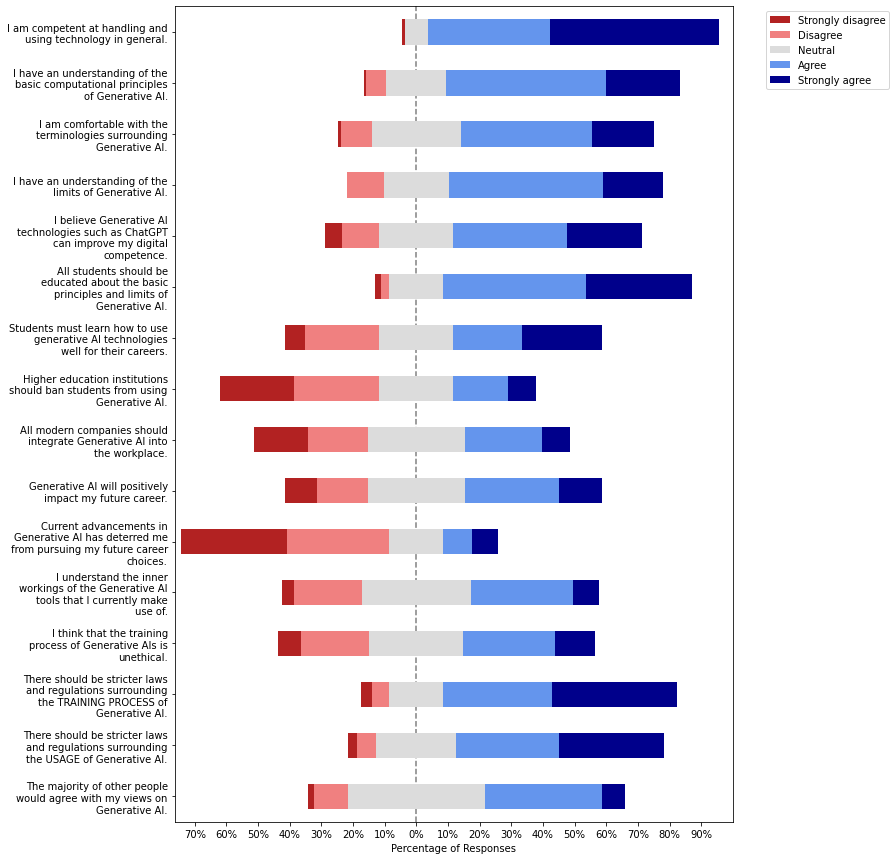

In [80]:
perspect_df = raw_data[groups["perspective"]]
pers_scale = [
    "Strongly disagree",
    "Disagree",
    "Neutral",
    "Agree",
    "Strongly agree"
]
plot_likert.plot_likert(perspect_df, pers_scale, plot_percentage=True, figsize=(10, 15))
plt.show()

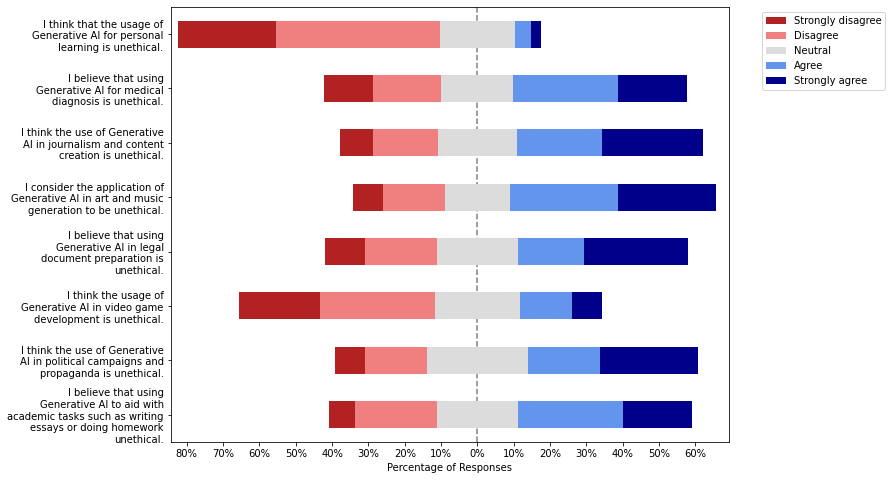

In [81]:
ethics_df = raw_data[groups["ethics"]]
eth_scale = [
    "Strongly disagree",
    "Disagree",
    "Neutral",
    "Agree",
    "Strongly agree"
]
plot_likert.plot_likert(ethics_df, eth_scale, plot_percentage=True, figsize=(10, 8))
plt.show()

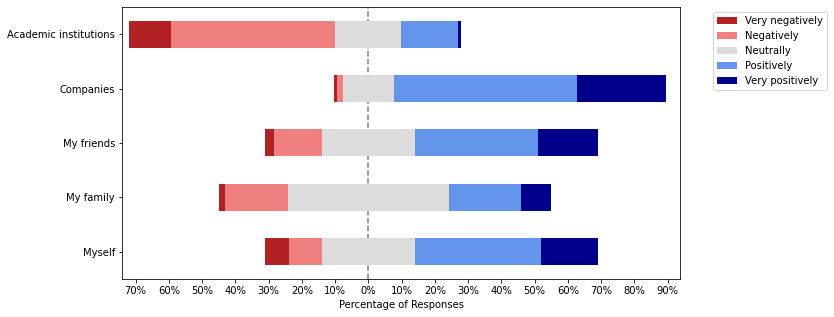

In [82]:
entities_df = raw_data[groups["entities"]]
ent_scale = [
    "Very negatively",
    "Negatively",
    "Neutrally",
    "Positively",
    "Very positively"
]
plot_likert.plot_likert(entities_df, ent_scale, plot_percentage=True, figsize=(10, 5))
plt.show()

<AxesSubplot:xlabel='Percentage of Responses'>

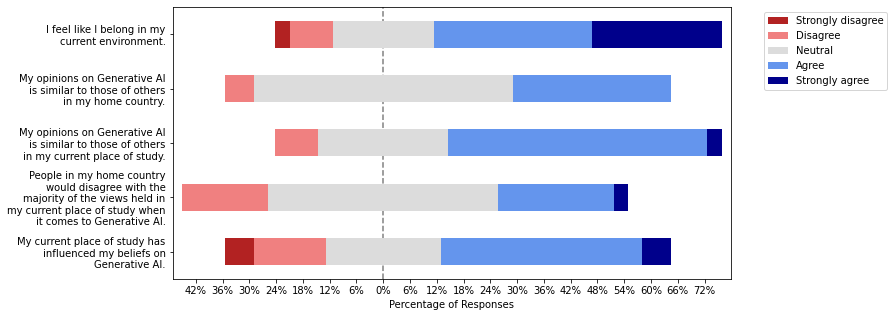

In [83]:
international_df = raw_data[groups["international"][1:]][raw_data["international_status"] == "Yes"]
inter_scale = [
    "Strongly disagree",
    "Disagree",
    "Neutral",
    "Agree",
    "Strongly agree"
]
plot_likert.plot_likert(international_df, inter_scale, plot_percentage=True, figsize=(10, 5))

In [84]:
genai_df = raw_data[groups["genai_tech"][:-1]]
genai_scale = [
    "Never",
    "Once or twice before",
    "Once per week",
    "Once per day",
    "More than once per day"
]
likert_genai = likert_to_df(genai_df, genai_scale)

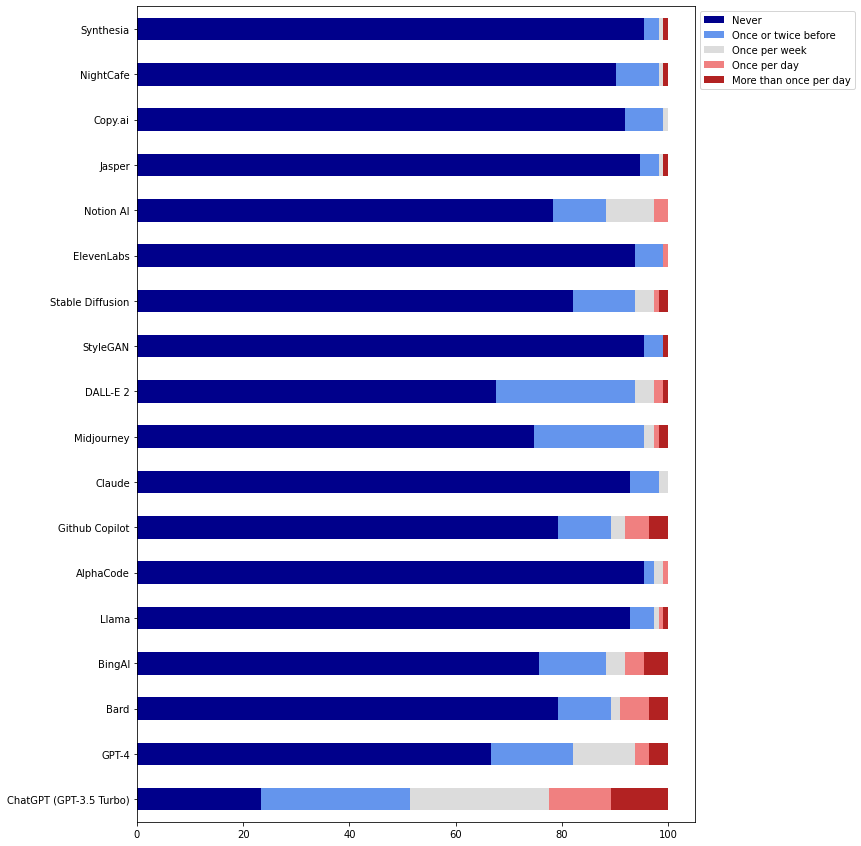

In [85]:
colors = [
    "darkblue",
    "cornflowerblue",
    "gainsboro",
    "lightcoral",
    "firebrick"
]
likert_genai.T.plot.barh(stacked=True, figsize=(10, 15), color=colors).legend(loc="upper left", bbox_to_anchor=(1.0, 1.0));
plt.show()

In [86]:
raw_data["genai_use"]

0                              I don't use Generative AI
1                                                    Fun
2          Fun, Academic work assistance, Art and design
3                                Fun, Writing assistance
4      Fun, Academic work assistance, Learning and sk...
                             ...                        
106    Fun, Academic work assistance, Writing assista...
107    Fun, Academic work assistance, Writing assista...
108    Fun, Academic work assistance, Learning and sk...
109                                                  Fun
110                                   Writing assistance
Name: genai_use, Length: 111, dtype: object

In [87]:
columns = [
    "Fun",
    "Academic work assistance", 
    "Writing assistance", 
    "Art and design", 
    "Language translation and generation", 
    "Music and sound generation", 
    "Learning and skill development", 
    "Automation of repetitive/boring tasks", 
    "Programming",
    "Coursework",
    "I don't use Generative AI",
    "Other"
]
split_df = pd.DataFrame(columns=columns, index=[0])
# initialize all columns to 0
for col in split_df.columns:
    split_df[col] = 0

for response in raw_data["genai_use"]:
    for category in response.split(","):
        category = category.strip()
        if category in split_df.columns:
            split_df[category] += 1
        else:
            print(category)
            split_df["Other"] += 1



Brainstorming ideas
Prototyping and placeholders


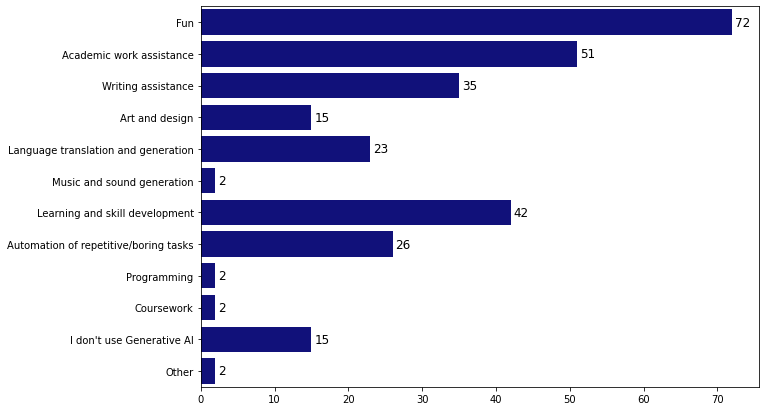

In [111]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.barplot(data=split_df, orient="h", color="darkblue", estimator=sum)
ax.bar_label(ax.containers[0], label_type="edge", padding=3, fontsize=12)
plt.show()